---

# Logistic Regression

## Introduction

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

## Type of Logistic Regression

The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes.

- Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.

* Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
* Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

## Assumptions for Logistic Regression


- The dependent variable must be categorical in nature.
* The independent variable should not have multi-collinearity.


## Algorithm

Logistic regression essentially uses a logistic function defined below to model a binary output variable (Tolles & Meurer, 2016). The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables. This is due to applying a nonlinear log transformation to the odds ratio. Logistic function is also called sigmoid function.

$$
Logistic Function = \frac{1}{1 + e^{-x}}
$$
Where x is the input variable.

<p align="center">
    <img src="logistic1.jpg" width="500">
</p>

---

## Dataset and Application

We will use the *penguins* dataset loaded from *seaborn* to demonstrate this new technique. 
The Introduction of *penguins* dataset is described in README.md

<p align="center">
    <img src="penguins.png" width="300">
</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

# Read the penguins dataset
df = sns.load_dataset("penguins").dropna()

In [2]:
df[96:146]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,Female
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,Male
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,Female
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male


In [3]:
scaler = MinMaxScaler()
adelie = df[96:146]
df[['bill_length_mm', 'flipper_length_mm']] = scaler.fit_transform(df[['bill_length_mm', 'flipper_length_mm']])

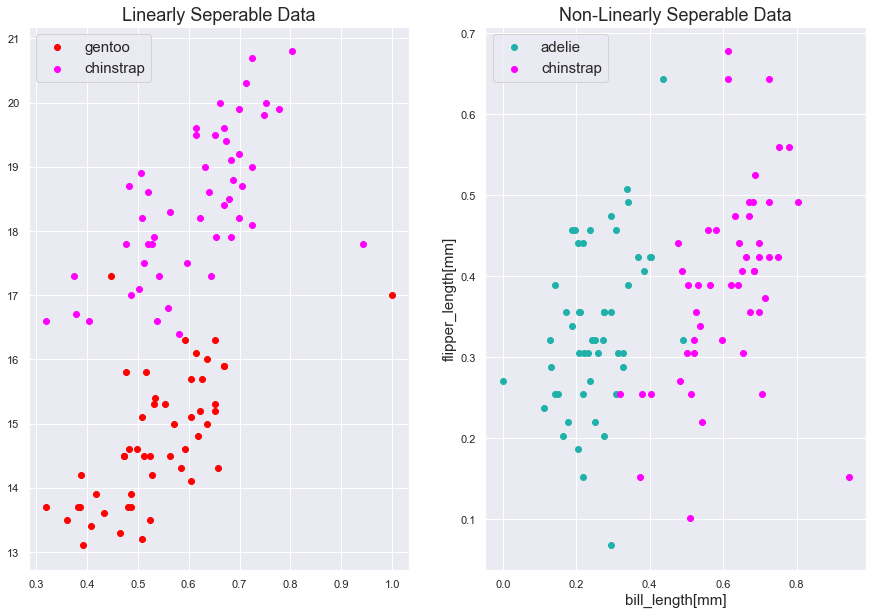

In [4]:
adelie = df[96:146]
chinstrap = df[147:197]
gentoo = df[df.species == "Gentoo"][:50]

#column names: bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g	sex

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "red", 
            label = "gentoo")
ax1.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "magenta", 
            label = "chinstrap")
ax2.set_xlabel("bill_length[mm]", fontsize = 15)
ax2.set_ylabel("bill_depth[mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)



ax2.scatter(adelie.bill_length_mm, 
            adelie.flipper_length_mm, 
            color = "lightseagreen", 
            label = "adelie")
ax2.scatter(chinstrap.bill_length_mm, 
            chinstrap.flipper_length_mm, 
            color = "magenta", 
            label = "chinstrap")

ax2.set_xlabel("bill_length[mm]", fontsize = 15)
ax2.set_ylabel("flipper_length[mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

---

As you can see in the left figure generated above, it is impossible to split the adelie and chinstrap by any linear function. The reason for this is that the two species of penguins on the left overlap in the same regions of space. 

---

---
Label each versicolor adelie penguin by 0 and each chinstrap penguin by 1. 
Then, only using the bill_length_mm as our feature measurment.

---

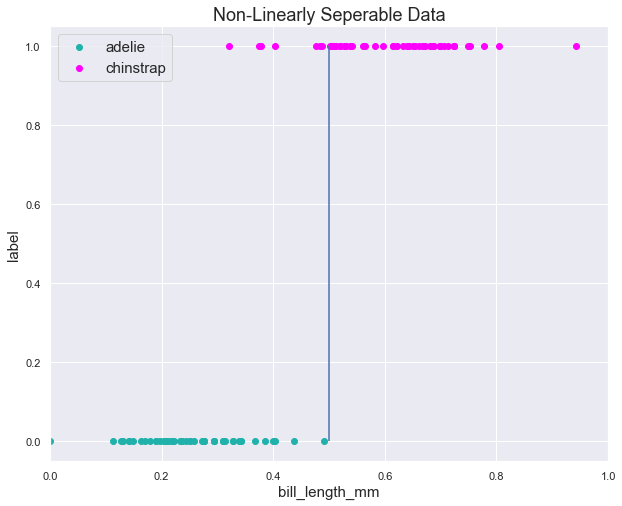

In [5]:
plt.figure(figsize = (10, 8))
plt.xlim((0,1))

plt.scatter(adelie.bill_length_mm, 
            np.zeros(50), 
            color = "lightseagreen", 
            label = "adelie")
plt.scatter(chinstrap.bill_length_mm, 
            np.ones(50), 
            color = "magenta", 
            label = "chinstrap")

plt.vlines(0.5, 0.0, 1.0)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

### The Sigmoid Activation Function

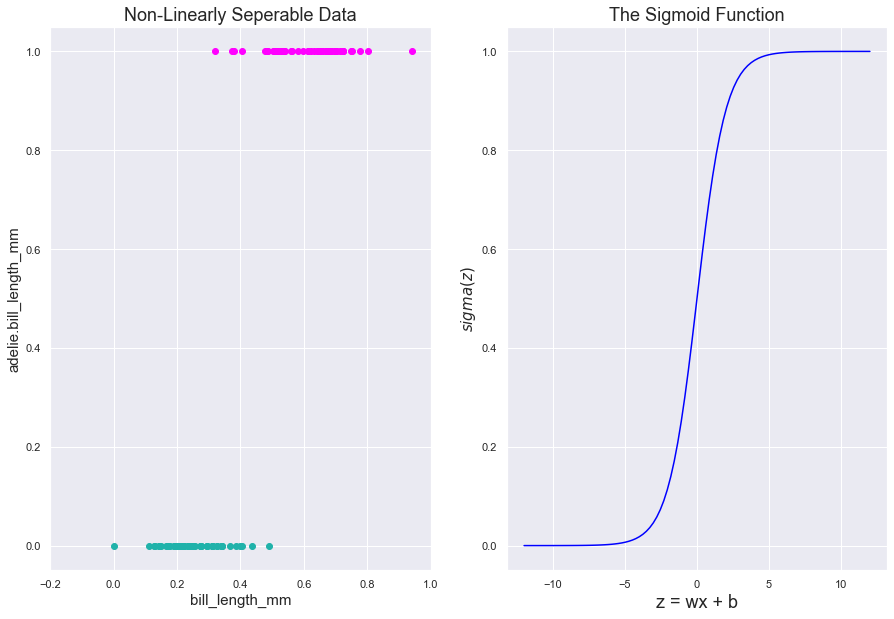

In [6]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((-.2,1))

ax1.scatter(adelie.bill_length_mm, 
            np.zeros(50), 
            color = "lightseagreen", 
            label = "adelie")
ax1.scatter(chinstrap.bill_length_mm, 
            np.ones(50), 
            color = "magenta", 
            label = "chinstrap")

ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("adelie.bill_length_mm", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [7]:
#defined a custom SingleNeuron class 
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
            #print(errors,N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

---
Write a function for the binary cross entropy loss.
$$
C(w_1, b; x^{(i)},y^{(i)}) = -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})
$$

---

In [8]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df[df.species != "Gentoo"].bill_length_mm.values
X = X.reshape(-1, 1)
y = np.where(df[df.species != "Gentoo"].species == "Adelie", 0, 1)

node.train(X, y, alpha = 0.03, epochs = 10000)

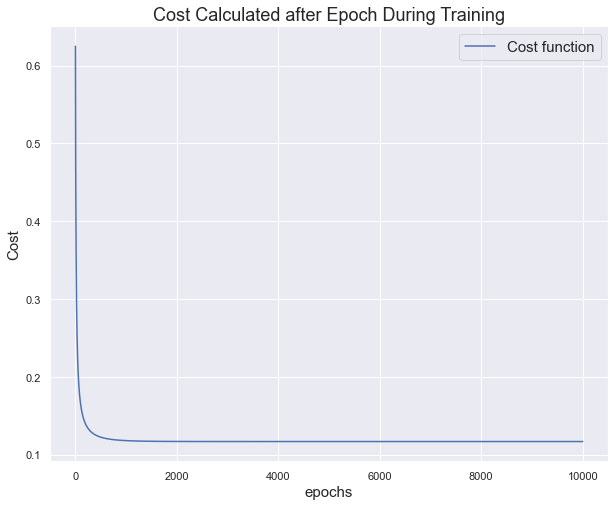

In [9]:
#visualize the binary cross entropy loss over each epoch by plotting the values in the SingleNeuron.errors_ attribute.
node.plot_cost_function() 
plt.show()

It looks good! Visualizing the cost function over the epochs during training helps us verify that are neuron is indeed learning over time. We can next visualize our prediction function.


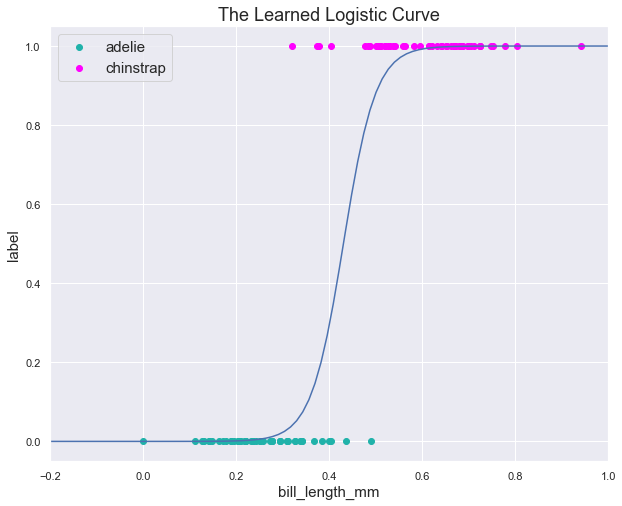

In [10]:
plt.figure(figsize = (10, 8))
plt.xlim((-0.2, 1))
plt.scatter(adelie.bill_length_mm, 
            np.zeros(50), 
            color = "lightseagreen", 
            label = "adelie")
plt.scatter(chinstrap.bill_length_mm, 
            np.ones(50), 
            color = "magenta", 
            label = "chinstrap")




domain = np.linspace(-0.3, 1, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [11]:
node.predict(X)

array([6.19564922e-03, 9.38908705e-03, 2.14376618e-02, 5.04615679e-04,
       7.62829475e-03, 5.03070027e-03, 6.87501135e-03, 4.81953776e-02,
       3.67931661e-03, 5.59758123e-05, 4.54463438e-04, 4.08389299e-03,
       1.79921532e-01, 4.53981164e-05, 8.95543910e-01, 1.59516653e-03,
       1.43678352e-03, 2.18381797e-04, 2.42314860e-03, 4.53275405e-03,
       1.16508924e-04, 2.91209016e-02, 2.63015039e-02, 1.77097785e-03,
       2.63015039e-02, 9.38908705e-03, 8.51584727e-04, 9.38908705e-03,
       3.94468050e-02, 3.68611673e-04, 6.87501135e-03, 4.53275405e-03,
       1.38111015e-01, 1.29410586e-03, 1.28106587e-02, 4.09293636e-04,
       3.56644085e-02, 2.42487606e-04, 5.39616261e-01, 6.90765432e-04,
       1.04149447e-02, 4.81953776e-02, 2.42487606e-04, 1.51056481e-01,
       1.04149447e-02, 1.74571464e-02, 8.50985354e-05, 1.15012948e-01,
       5.04102950e-05, 6.48331926e-02, 5.58304164e-03, 2.91209016e-02,
       4.09293636e-04, 1.29410586e-03, 1.77119833e-04, 5.87655184e-02,
      

We nect convert the predicted probabilities to binary results. 

In [12]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

Compute the classification error over our training data.

$$
E_c = \frac{1}{N}\sum_{i=1}^{N}[\hat{y}^{(i)} \neq y^{(i)}],
$$

where $[\hat{y}^{(i)} \neq y^{(i)}] = 1$ whenever $\hat{y}^{(i)} \neq y^{(i)}$, and zero otherwise.

In [13]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.0514018691588785


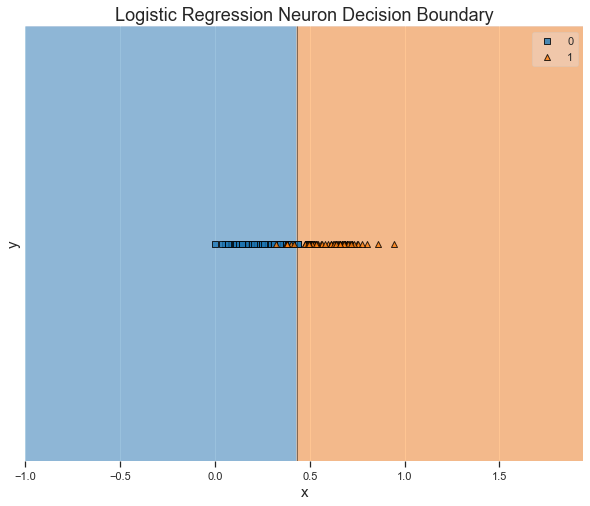

In [14]:
node.plot_decision_boundary(X, y)
plt.show()

---

## Logistic Regression Single Neuron with Multiple Inputs

We next instantiate a new```SingleNeuron``` model with bill_length_mm and flipper_length_mm as input, train this model with the same learning rate and number of epochs as the variable ```node```, and then compare the cost function over epochs between the two models.

---

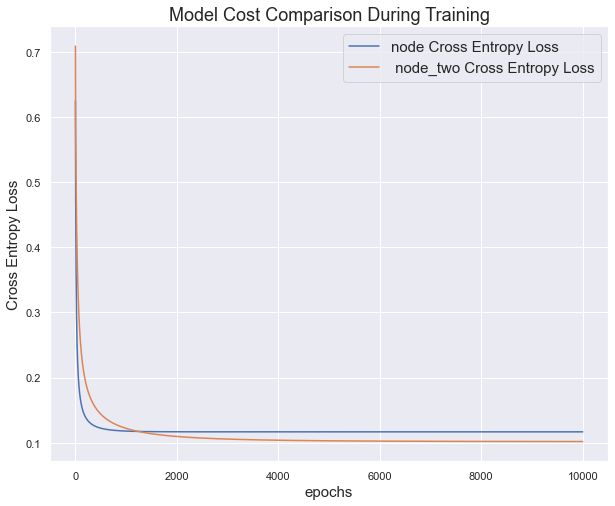

In [15]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of bill_length_mm and flipper_length_mm for
# the adelie and chinstrap penguins, respectively. 
X_two = df[df.species != "Gentoo"][["bill_length_mm", "flipper_length_mm"]].values
# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

---
As we can see by the figures generated above, using two features results in a lower cost function after about 1200 epochs with the same learning rate and number of epochs. 

We next visualize the decision boundary generated by the trained weights and bias of node_two.

---

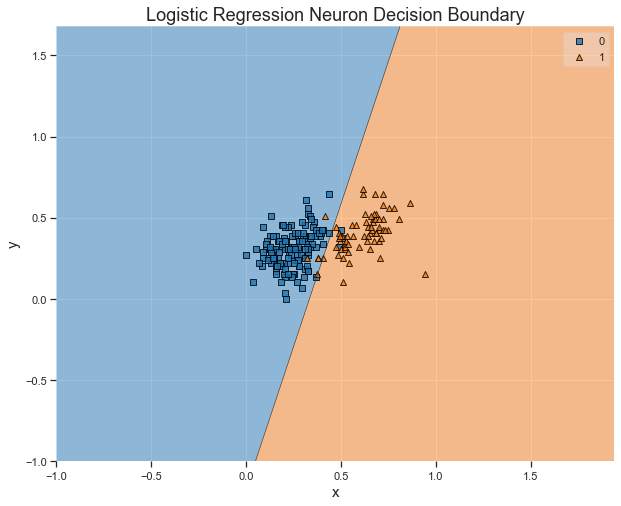

In [22]:
node_two.plot_decision_boundary(X_two, y)

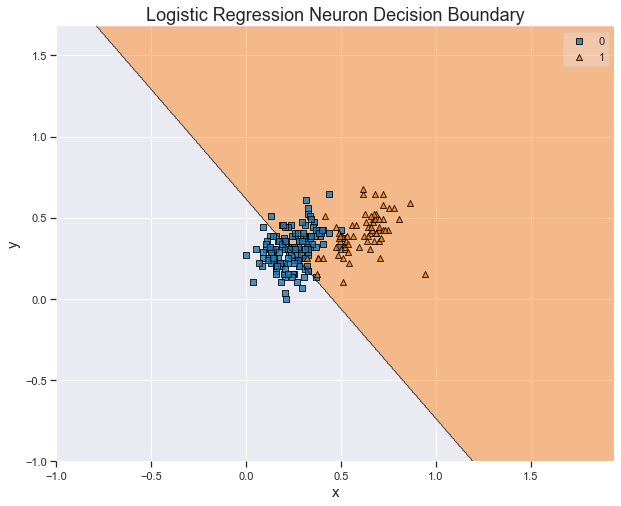

In [23]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)
# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df[df.species != "Gentoo"][["bill_length_mm", "flipper_length_mm"]].values

y_three = np.where(df[df.species != "Gentoo"].species == "Adelie", 0, 1)

# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

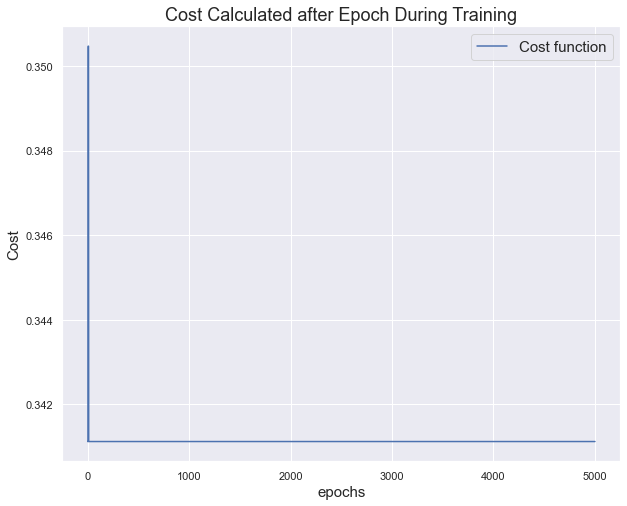

In [24]:
node_three.plot_cost_function()

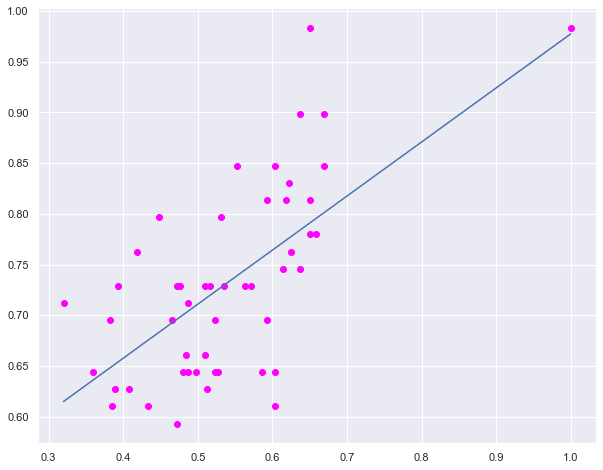

In [25]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df[df.species == "Gentoo"][:50].bill_length_mm.values
X_four = X_four.reshape(-1, 1)

y_four = df[df.species == "Gentoo"][:50].flipper_length_mm.values

# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "setosa", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()

## Reference

Logistic regression in machine learning - javatpoint. www.javatpoint.com. (n.d.). Retrieved May 6, 2022, from https://www.javatpoint.com/logistic-regression-in-machine-learning 

Logistic regression. Logistic Regression - an overview | ScienceDirect Topics. (n.d.). Retrieved May 6, 2022, from https://www.sciencedirect.com/topics/computer-science/logistic-regression 

Wikimedia Foundation. (2022, May 1). Logistic regression. Wikipedia. Retrieved May 6, 2022, from https://en.wikipedia.org/wiki/Logistic_regression 